# Assigment 2 Overview
In this assignment, we are asked to train a few decision tree classifiers on the Breast cancer wisconsin (diagnostic) dataset available on Scikit-Learn and compare their performances.

# Get the Data

In [1]:
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Preprocessing

## D1

In [3]:
data = data.reindex(sorted(data.columns), axis=1)

In [4]:
data

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.30010,0.07871,...,2019.0,0.66560,0.2654,0.7119,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.08690,0.05667,...,1956.0,0.18660,0.1860,0.2416,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.19740,0.05999,...,1709.0,0.42450,0.2430,0.4504,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.24140,0.09744,...,567.7,0.86630,0.2575,0.6869,0.17300,98.87,14.910,0.20980,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.19800,0.05883,...,1575.0,0.20500,0.1625,0.4000,0.07678,152.20,22.540,0.13740,0.2364,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,158.70,0.02891,0.02454,0.05198,0.004239,1479.0,0.11590,0.13890,0.24390,0.05623,...,2027.0,0.21130,0.2216,0.4107,0.07115,166.10,25.450,0.14100,0.2060,26.40
565,99.04,0.02423,0.01678,0.03950,0.002498,1261.0,0.10340,0.09791,0.14400,0.05533,...,1731.0,0.19220,0.1628,0.3215,0.06637,155.00,23.690,0.11660,0.2572,38.25
566,48.55,0.03731,0.01557,0.04730,0.003892,858.1,0.10230,0.05302,0.09251,0.05648,...,1124.0,0.30940,0.1418,0.3403,0.07820,126.70,18.980,0.11390,0.2218,34.12
567,86.22,0.06158,0.01664,0.07117,0.006185,1265.0,0.27700,0.15200,0.35140,0.07016,...,1821.0,0.86810,0.2650,0.9387,0.12400,184.60,25.740,0.16500,0.4087,39.42


In [5]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, bbox_inches='tight', pad_inches=0.3, ** kwargs):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution,
                bbox_inches=bbox_inches, pad_inches=pad_inches, **kwargs)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

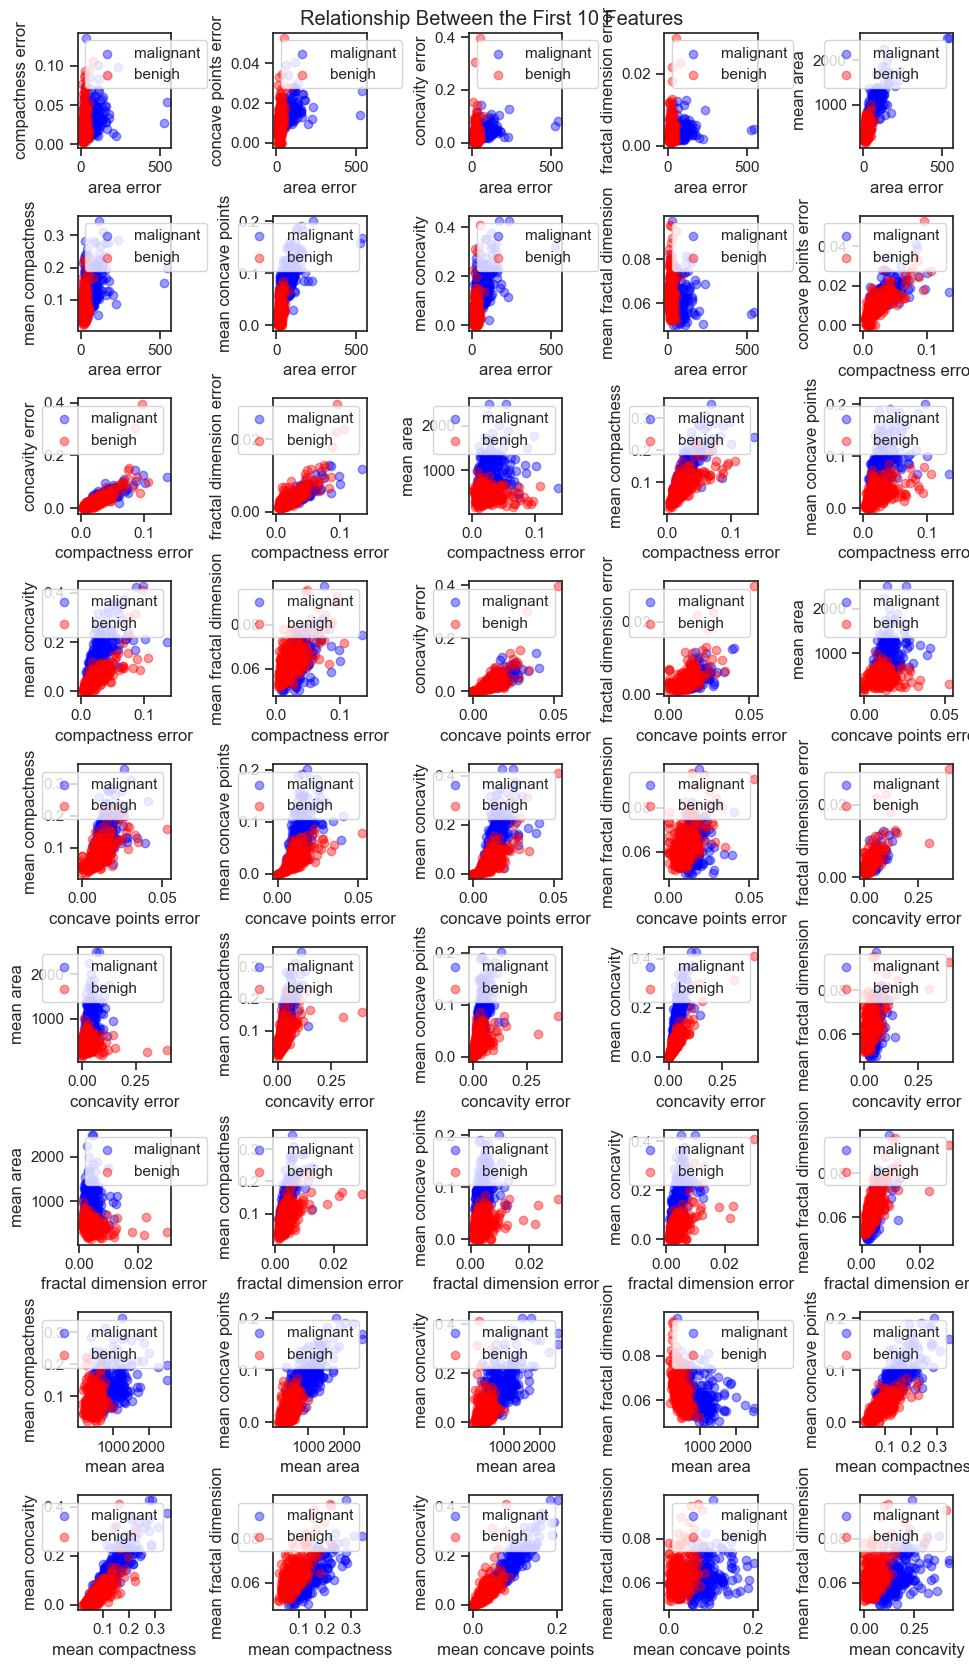

In [7]:
# Separate instances based on class
class_0 = data[target == 0]
class_1 = data[target == 1]

# Scatter plot for the first 10 features
sns.set_theme(style="ticks")

fig, axes = plt.subplots(9, 5, figsize=(10, 17))
fig.suptitle('Relationship Between the First 10 Features')

colnames = data.columns

count = 0
for i in range(10):
    for j in range(i+1, 10):
        ax = axes[count//5, count % 5]
        count += 1
        ax.scatter(class_0.iloc[:, i], class_0.iloc[:, j],
                   color='blue', label='malignant', alpha=0.4)
        ax.scatter(class_1.iloc[:, i], class_1.iloc[:, j],
                   color='red', label='benigh', alpha=0.4)
        ax.set_xlabel(colnames[i])
        ax.set_ylabel(colnames[j])
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
save_fig('d1_1')
plt.show()

<Figure size 2050x2000 with 0 Axes>

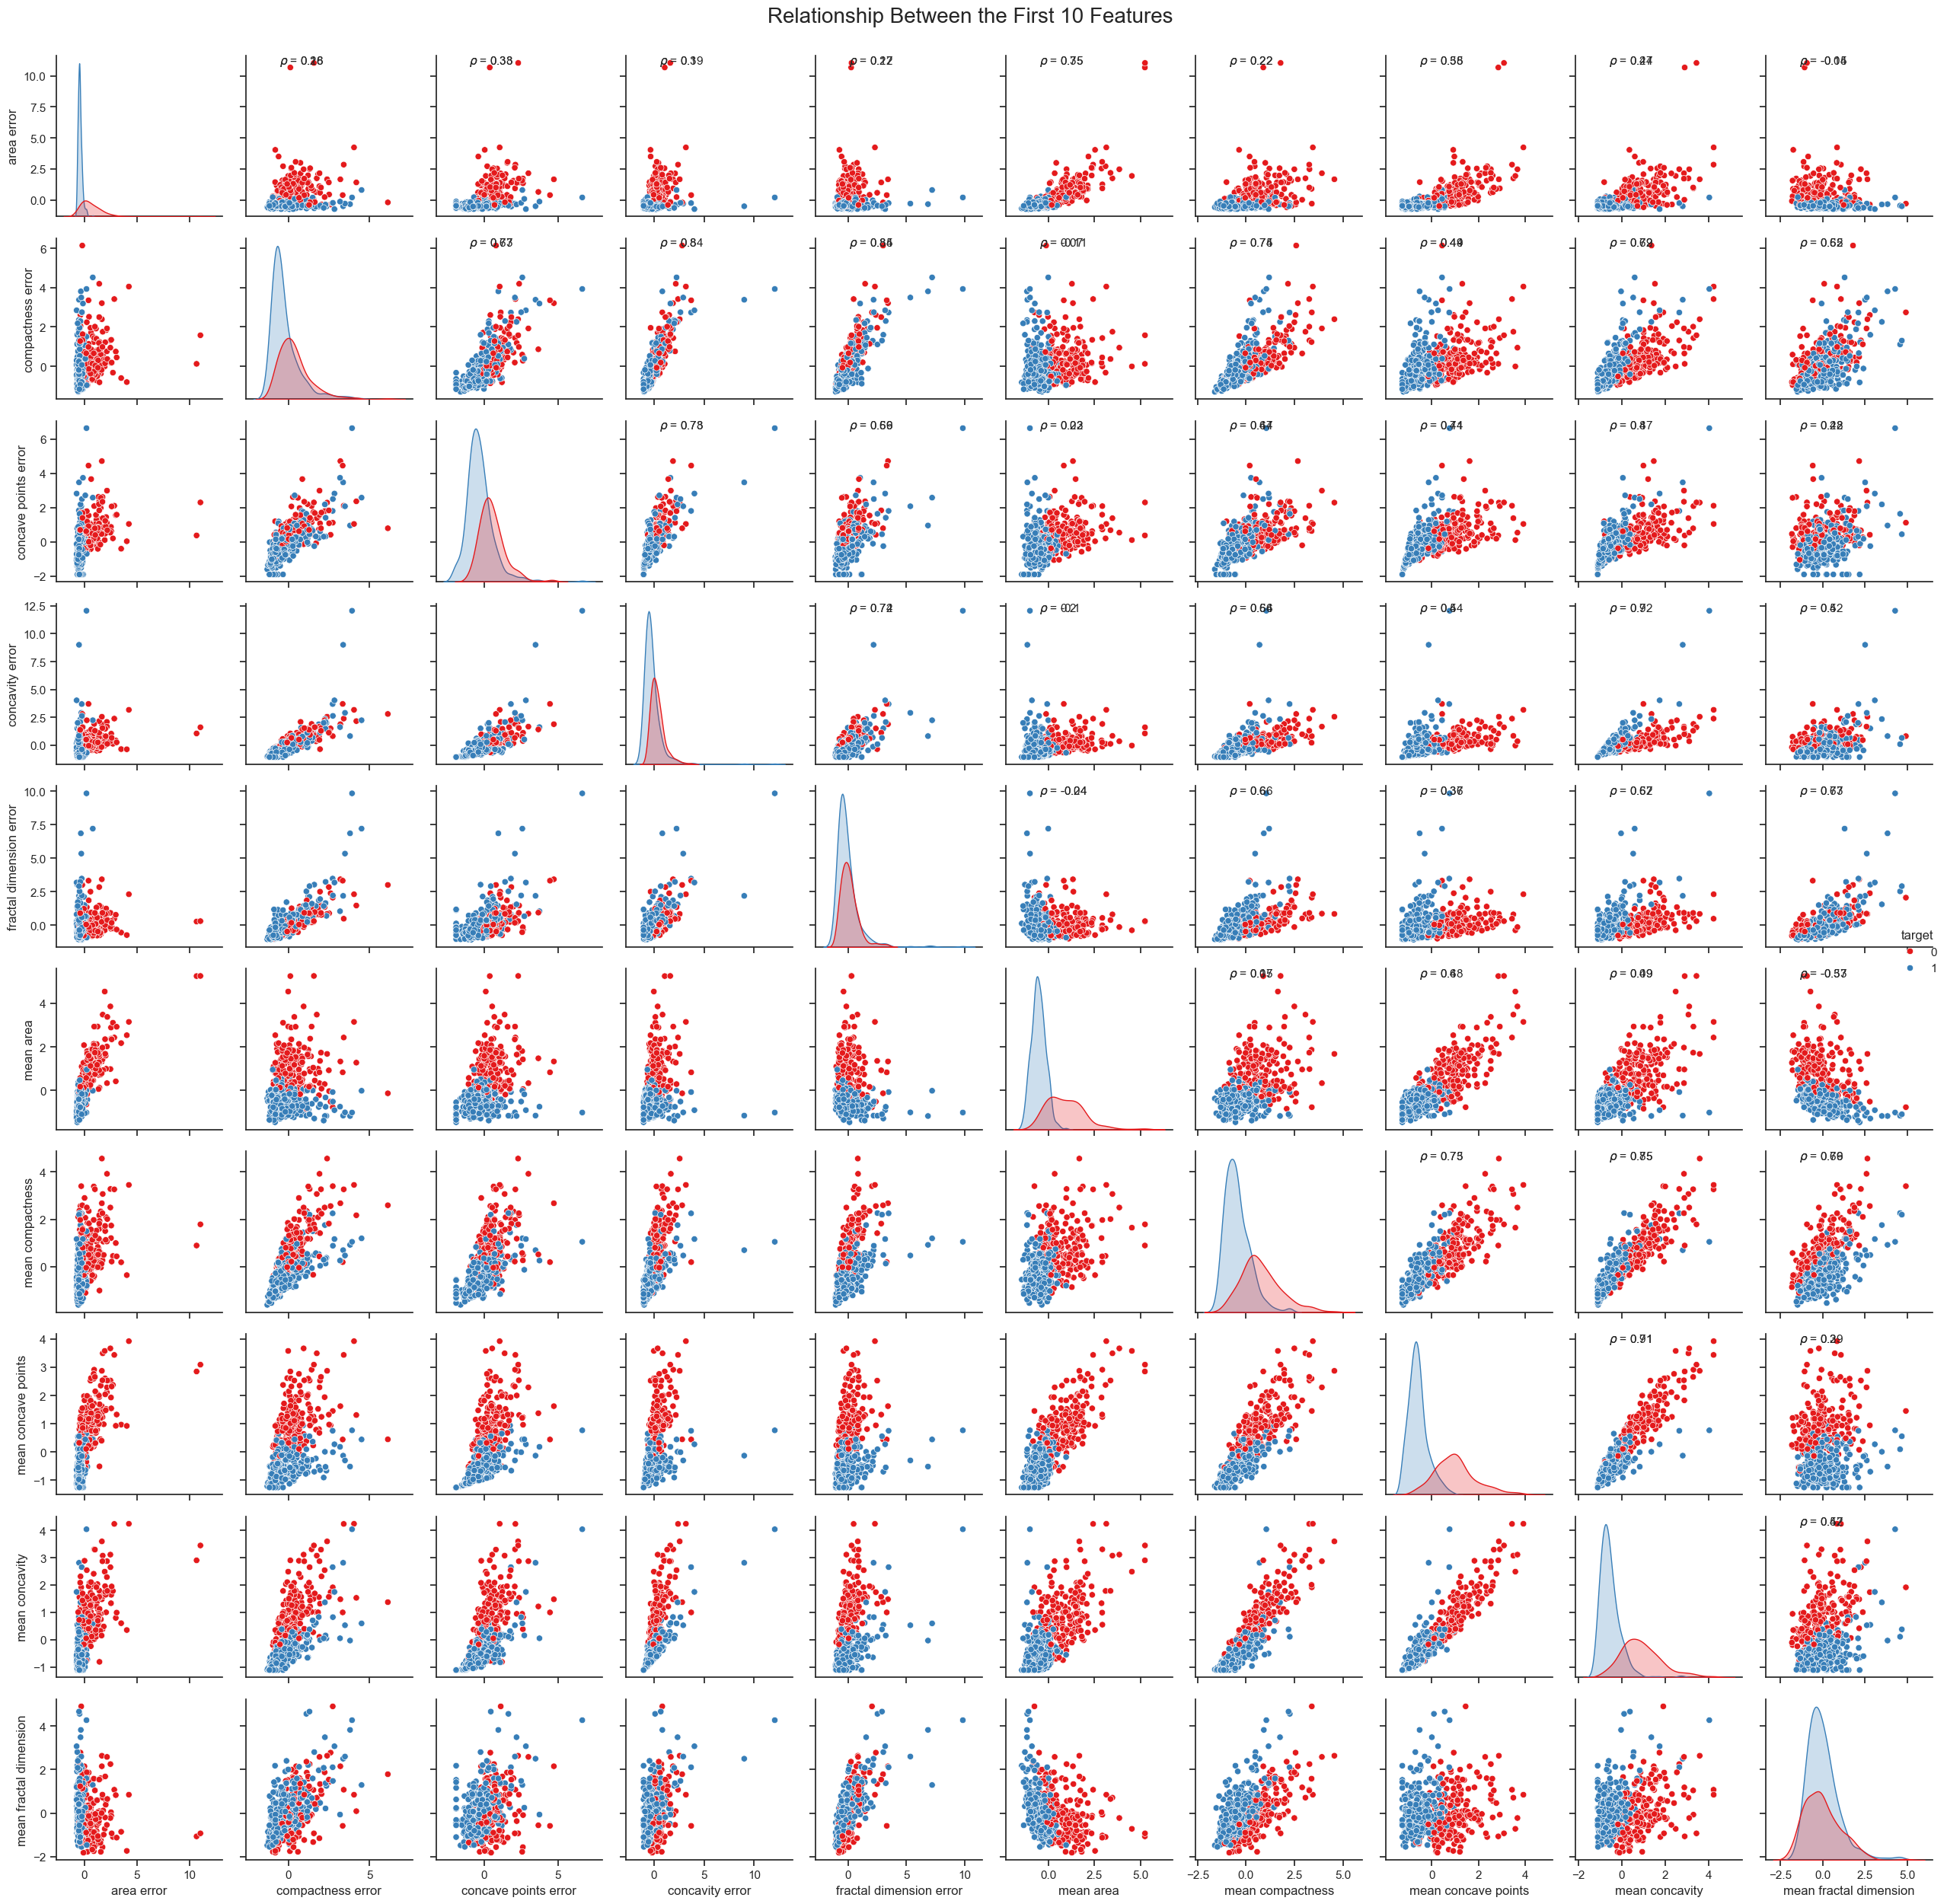

In [8]:
# Reference: https://medium.com/@tutorialcreation81/exploratory-data-analysis-of-breast-cancer-dataset-8c4cd7712f6f
# https://indianaiproduction.com/seaborn-pairplot/
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=11, xycoords=ax.transAxes)


def pair_plot_features(y: pd.DataFrame, X: pd.DataFrame, start: int, stop: int):
    """
    perform pair plot on set of variables

    args:
        y (pd.DataFrame): dataframe of dependent variable
        X (pd.DataFrame): dataframe of independent variable
        start (int): where to start in independent variables
        stop (int): where to stop in independent variables

    returns:
        pair plots of set of features from start to stop
    """
    data = X
    data_n_2 = (data - data.mean()) / (data.std())  # standardization
    data = pd.concat([y, data_n_2.iloc[:, start:stop]], axis=1)
    plt.figure(figsize=(20.5, 20))
    grid = sns.pairplot(data=data, kind="scatter",
                        hue="target", palette="Set1")
    grid = grid.map_upper(corr)
    grid.figure.suptitle(
        'Relationship Between the First 10 Features', y=1, fontsize=20)


pair_plot_features(target.to_frame(), data.iloc[:, :10], 0, 10)
save_fig('d1_2')

## D3

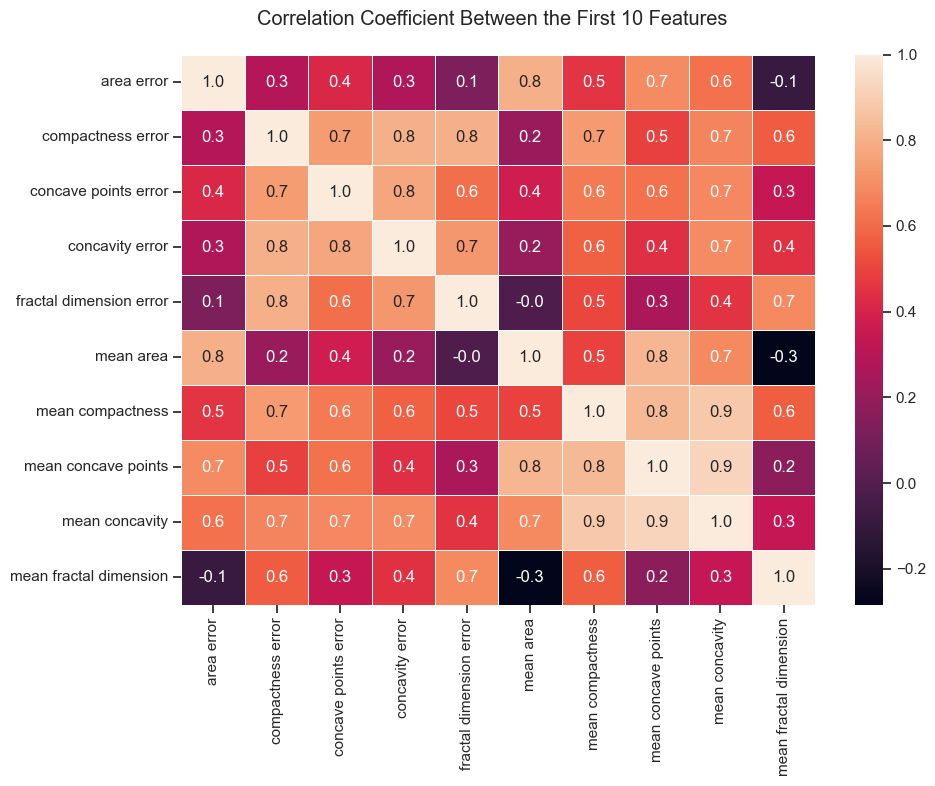

In [9]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html

# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle('Correlation Coefficient Between the First 10 Features')
    sns.heatmap(corrmat, annot=True, linewidths=.5, fmt='.1f', ax=ax)
    # plt.xticks(rotation=45)


plot_correlation_heatmap(data.iloc[:, :10])
save_fig('d3')

## D5

In [10]:
columns_to_drop = ['mean perimeter', 'mean radius',
                   'worst radius', 'worst perimeter', 'radius error']

In [11]:
data = data.drop(columns_to_drop, axis=1)

In [12]:
data

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,symmetry error,texture error,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.30010,0.07871,...,0.03003,0.9053,2019.0,0.66560,0.2654,0.7119,0.11890,0.16220,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.08690,0.05667,...,0.01389,0.7339,1956.0,0.18660,0.1860,0.2416,0.08902,0.12380,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.19740,0.05999,...,0.02250,0.7869,1709.0,0.42450,0.2430,0.4504,0.08758,0.14440,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.24140,0.09744,...,0.05963,1.1560,567.7,0.86630,0.2575,0.6869,0.17300,0.20980,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.19800,0.05883,...,0.01756,0.7813,1575.0,0.20500,0.1625,0.4000,0.07678,0.13740,0.2364,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,158.70,0.02891,0.02454,0.05198,0.004239,1479.0,0.11590,0.13890,0.24390,0.05623,...,0.01114,1.2560,2027.0,0.21130,0.2216,0.4107,0.07115,0.14100,0.2060,26.40
565,99.04,0.02423,0.01678,0.03950,0.002498,1261.0,0.10340,0.09791,0.14400,0.05533,...,0.01898,2.4630,1731.0,0.19220,0.1628,0.3215,0.06637,0.11660,0.2572,38.25
566,48.55,0.03731,0.01557,0.04730,0.003892,858.1,0.10230,0.05302,0.09251,0.05648,...,0.01318,1.0750,1124.0,0.30940,0.1418,0.3403,0.07820,0.11390,0.2218,34.12
567,86.22,0.06158,0.01664,0.07117,0.006185,1265.0,0.27700,0.15200,0.35140,0.07016,...,0.02324,1.5950,1821.0,0.86810,0.2650,0.9387,0.12400,0.16500,0.4087,39.42


# Fitting a Decision Tree Model with Default Hyperparameters

## Split the Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=5508)

## D6

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_cm_and_table(figure_title, figure_name, confusion_matrix, table_content, row_labels, col_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.axis('off')
    ax1.axis('tight')
    ax1.margins(x=0, y=0)
    table = ax1.table(cellText=table_content, rowLabels=row_labels,
                      colLabels=col_labels, loc='center', cellLoc='center')
    # Adjust font size
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    # Adjust cell heights and widths
    table.scale(1, 5)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[0, 1])
    disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix (Test Set)')

    fig.suptitle(figure_title, fontsize='xx-large')
    save_fig(figure_name, tight_layout=True,
             bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

tree_clf = DecisionTreeClassifier(random_state=5508)
tree_clf.fit(X_train, y_train)


def dt_evaluate(model, X, y, is_test=False):
    pred = model.predict(X)
    accuracy = round(accuracy_score(y, pred), 2)
    precision = round(precision_score(y, pred), 2)
    recall = round(recall_score(y, pred), 2)
    if is_test:
        cm = confusion_matrix(y, pred)
        return accuracy, precision, recall, cm

    return accuracy, precision, recall


train_accuracy, train_precision, train_recall = dt_evaluate(
    tree_clf, X_train, y_train)
test_accuracy, test_precision, test_recall, test_cm = dt_evaluate(
    tree_clf, X_test, y_test, is_test=True)

rows = ['Train', 'Test']
columns = ['Accuracy', 'Precision', 'Recall']
cell_text = [[train_accuracy, train_precision, train_recall],
             [test_accuracy, test_precision, test_recall]]

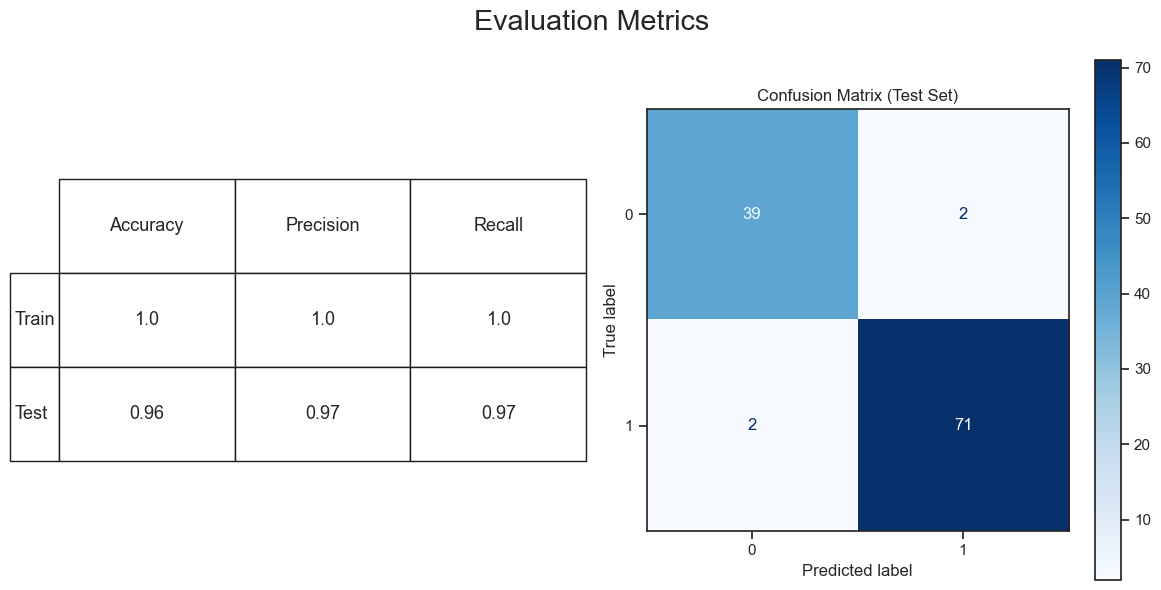

In [33]:
plot_cm_and_table('Evaluation Metrics', 'd6',
                  test_cm, cell_text, rows, columns)

## D8